In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

A base de dados se trata de uma pesquisa qualitativa na forma de questionário com respostas tabuladas. 
Abaixo está o código para importar os dados e realizar o primeiro tratamento, realizando a substituição da interrogação por um valor numérico não utilizado na pesquisa (usei o -1), dessa forma poderemos explorar os dados de forma mais assertiva. Logo, utilizei a função ProfileReport para exibir estatísticas gerais sobre a base de dados.

In [160]:
#importa os dados
df = pd.read_csv('wiki4HE.csv', sep=';')
#substitui a interrogração por -1 em todos os atributos para facilitar as análises
df = df.replace(['?'],[-1])
#converte todas as colunas para o tipo inteiro:
for coluna in df.columns.values:
    df[coluna] = df[coluna].astype(int)
#exibe estatísticas gerais sobre a base de dados
pp.ProfileReport(df)

Number of variables,53
Number of observations,913
Total Missing (%),0.0%
Total size in memory,189.1 KiB
Average record size in memory,212.1 B
Numeric,50
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


A partir das estatísticas acima é possível perceber que 85,9% dos respondentes não possuem registro na Wikipedia, e que a idade média é 42 anos.
Para responder ao item 2 do desafio, o primeiro passo é analisar a correlação entre diferentes características de grupos de usuários como idade, gênero e outros. Para isso isolei os campos contendo características dos professores, juntamente com suas respostas para os itens 'ENJ1' e'ENJ2'. Abaixo é gerada a matriz de correlação entre os atributos.

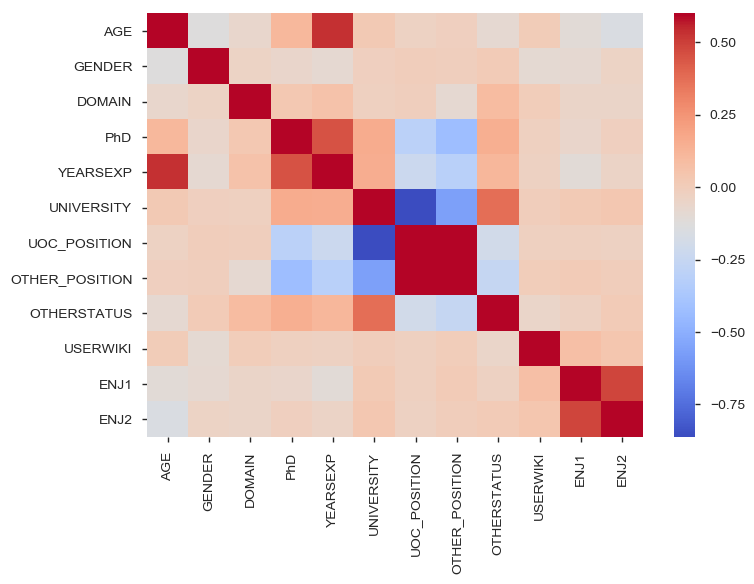

In [94]:
#Gera novo dataframe somente com os dados de professores e os itens ENJ1 e ENJ2
dados = df[['AGE','GENDER','DOMAIN','PhD','YEARSEXP','UNIVERSITY','UOC_POSITION','OTHER_POSITION','OTHERSTATUS','USERWIKI','ENJ1','ENJ2']]
#Gera a Matrix de correlação
corrmat = dados.corr()
sb.heatmap(corrmat, vmax=0.6, cmap='coolwarm');

Na matriz acima vemos a correlação combinando pares de atributos. As correlações mais fortes são entre os pares 'AGE', 'YEARSEXP' (correlação positiva) e 'UNIVERSITY', 'UOC_POSITION' (correlação negativa). 
Percebe-se que não existe uma correlação forte entre os itens da categoria Perceived Enjoyment ('ENJ1' e 'ENJ2') e as características dos professores quando os analisamos individualmente. Abaixo vou submeter os dados a um modelo de árvore de decisão a fim de identificar se a combinação dos atributos de características podem prever a resposta aos itens 'ENJ1' e 'ENJ2' e qual a importância de cada atributo. Vou separar 70% dos dados para treinamento e 30% para testes.

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#pega somente os valores dos atributos
data = dados.values
#separa os atributos de caracteristicas dos professores
caracteristicas= data[:,0:10]
#separa os dados de respostas para ENJ1
ENJ1 = data[:,-2]
#separa os dados de respostas para ENJ2
ENJ2 = data[:,-1]

Análise das respostas para ENJ1:

In [243]:
# Divide as 'caracteristicas' e 'respostas' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, 
                                                    ENJ1, 
                                                    test_size = 0.3)
#instancia o modelo limitando a profundida máxima em 5 afim de evitar o overfit. 
#No overfit o algoritmo perde a capacidade de generalização e consequentemente a capacidade de predição
model = DecisionTreeClassifier(max_depth=5)
#treina o modelo
model.fit(X_train, y_train)
#realiza uma predição: 
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Acurácia nos dados de teste:', test_accuracy)
#verifica a importância dos atributos na composição da predição:
importances = model.feature_importances_
index=['AGE','GENDER','DOMAIN','PhD','YEARSEXP','UNIVERSITY','UOC_POSITION','OTHER_POSITION','OTHERSTATUS','USERWIKI']
teste = pd.DataFrame(importances, index=index, columns=['IMPORTANCIA'])
print(teste.sort_values(by='IMPORTANCIA', ascending=False))

Acurácia nos dados de teste: 0.354014598540146
                IMPORTANCIA
YEARSEXP           0.311952
AGE                0.275836
USERWIKI           0.098969
OTHER_POSITION     0.091547
DOMAIN             0.073477
GENDER             0.068473
PhD                0.046764
OTHERSTATUS        0.032982
UNIVERSITY         0.000000
UOC_POSITION       0.000000


Análise das respostas para ENJ2:

In [244]:
# Divide as 'caracteristicas' e 'respostas' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, 
                                                    ENJ2, 
                                                    test_size = 0.3)
#instancia o modelo limitando a profundida máxima em 5 afim de evitar o overfit. 
#No overfit o algoritmo perde a capacidade de generalização e consequentemente a capacidade de predição
model = DecisionTreeClassifier(max_depth=5)
#treina o modelo
model.fit(X_train, y_train)
#realiza uma predição: 
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Acurácia nos dados de teste:', test_accuracy)
#verifica a importância dos atributos na composição da predição:
importances = model.feature_importances_
index=['AGE','GENDER','DOMAIN','PhD','YEARSEXP','UNIVERSITY','UOC_POSITION','OTHER_POSITION','OTHERSTATUS','USERWIKI']
teste = pd.DataFrame(importances, index=index, columns=['IMPORTANCIA'])
print(teste.sort_values(by='IMPORTANCIA', ascending=False))

Acurácia nos dados de teste: 0.3795620437956204
                IMPORTANCIA
AGE                0.386178
YEARSEXP           0.211131
DOMAIN             0.124844
GENDER             0.100877
OTHER_POSITION     0.068746
UNIVERSITY         0.043847
UOC_POSITION       0.037460
PhD                0.018774
OTHERSTATUS        0.008142
USERWIKI           0.000000


Podemos perceber que a combinação dos atributos de características dos professores pode identificar com acurácia de quase 40% a resposta aos itens 'ENJ1' e 'ENJ2', sendo que o atributo mais relevante para determinar a resposta é a idade ('AGE'), seguido do atributo ('YEARSEXP'). Este fato reforça a correlação positiva entre os dois atributos evidenciada na matriz de correlação. Outro atributo importante na determinação da resposta foi o 'DOMAIN' que correspondeu a mais de 10% de participação no resultado.